In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import *
import tensorflow
from tensorflow.keras.utils import to_categorical
from keras import callbacks
from keras.models import load_model
import os.path

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [24]:
def process_img(path):
    img = Image.open(path)
    if img.size[0] > img.size[1]:
        scale = 100 / img.size[1]
        new_h = int(img.size[1]*scale)
        new_w = int(img.size[0]*scale)
        new_size = (new_w, new_h)
    else:
        scale = 100 / img.size[0]
        new_h = int(img.size[1]*scale)
        new_w = int(img.size[0]*scale)
        new_size = (new_w, new_h)

    resized = img.resize(new_size)
    resized_img = np.array(resized, dtype=np.uint8)

    left = 0
    right = left + 100
    up = 0
    down = up + 100
    cropped = resized.crop((left, up, right, down))
    cropped_img = np.array(cropped, dtype=np.uint8)

    cropped_img = cropped_img / 255

    return cropped_img

In [30]:
train_categories = []
x_train = np.empty((790, 100, 100, 3))
k = 0
y_train = []
for index, i in enumerate(os.listdir("./data/archive/train")):
    train_categories.append(i)
    for j in os.listdir('./data/archive/train/'+i):
        img = process_img('./data/archive/train/'+i+'/'+j)
        if img.shape[-1] > 3:
            x_train[k] = x_train[k-1]
            y_train.append(y_train[-1])
        else:    
            x_train[k] = img
            y_train.append(index)
        k += 1

In [31]:
y_train = np.array(y_train)
y_train = to_categorical(y_train)

In [84]:
model = load_model('82acc_model.h5')

In [85]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
callback = callbacks.EarlyStopping(monitor="loss", patience=3)

In [86]:
history = model.fit(x=x_train, y=y_train, batch_size=None, callbacks=[callback], epochs=20)

Epoch 1/20
25/25 [==============================] - 26s 908ms/step - loss: 0.4460 - accuracy: 0.8252
Epoch 2/20
25/25 [==============================] - 22s 895ms/step - loss: 0.2643 - accuracy: 0.9156
Epoch 3/20
25/25 [==============================] - 22s 894ms/step - loss: 0.3178 - accuracy: 0.8895
Epoch 4/20
25/25 [==============================] - 22s 880ms/step - loss: 0.2628 - accuracy: 0.9112
Epoch 5/20
25/25 [==============================] - 23s 913ms/step - loss: 0.2098 - accuracy: 0.9267
Epoch 6/20
25/25 [==============================] - 22s 875ms/step - loss: 0.3021 - accuracy: 0.8945
Epoch 7/20
25/25 [==============================] - 22s 894ms/step - loss: 0.1883 - accuracy: 0.9400
Epoch 8/20
25/25 [==============================] - 22s 896ms/step - loss: 0.2193 - accuracy: 0.9190
Epoch 9/20
25/25 [==============================] - 22s 880ms/step - loss: 0.1972 - accuracy: 0.9387
Epoch 10/20
25/25 [==============================] - 22s 883ms/step - loss: 0.2127 - accura

In [87]:
x_test = np.empty((79, 100, 100, 3))
k = 0
y_test = []
for index, i in enumerate(os.listdir("./data/archive/test")):
    for j in os.listdir('./data/archive/test/'+i):
        img = process_img('./data/archive/test/'+i+'/'+j)
        if img.shape[-1] > 3:
            x_test[k] = x_test[k-1]
            y_test.append(y_test[-1])
        else:    
            x_test[k] = img
            y_test.append(index)
        k += 1

In [88]:
y_test = np.array(y_test)
y_test = to_categorical(y_test)

In [97]:
my_img_ind = 13
my_img = x_test[my_img_ind:my_img_ind+1]

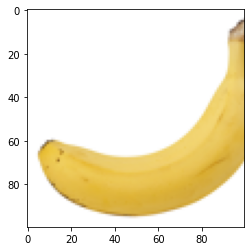

In [98]:
#print(x_test[0])
plt.imshow(x_test[my_img_ind])
plt.show()

In [99]:
train_categories[np.argmax(model.predict(x=my_img))]

'banana'

In [100]:
model.evaluate(x=x_test, y=y_test)

3/3 [==============================] - 0s 121ms/step - loss: 0.0813 - accuracy: 0.9620


[0.08129098266363144, 0.9620253443717957]

In [101]:
model.save("96acc_model.h5")